importing necessary libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import regularizers
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import BatchNormalization

In [2]:
df = pd.read_csv('/content/train_u6lujuX_CVtuZ9i.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


*********************Data Cleaning *******************

In [5]:
df.drop(columns={'Loan_ID'},inplace=True)

In [6]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
df.shape

(614, 12)

In [8]:
df.dropna(inplace=True)

In [9]:
df.shape

(480, 12)

****One Hot Encoding****

In [10]:
df['Gender'] = df['Gender'].map({'Male':0, 'Female':1})

In [11]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,0,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,0,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,0,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,0,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,0,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,0,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,0,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [12]:
df.dtypes

,0
Gender,int64
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64
Credit_History,float64


In [13]:
df['Married'] = df['Married'].map({'Yes':1, 'No':0})
df['Education'] = df['Education'].map({'Graduate':1, 'Not Graduate':0})
df['Self_Employed'] = df['Self_Employed'].map({'Yes':1, 'No':0})
df['Loan_Status'] = df['Loan_Status'].map({'Y':1, 'N':0})

In [14]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,1
5,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,Urban,1


In [15]:
df.dtypes

,0
Gender,int64
Married,int64
Dependents,object
Education,int64
Self_Employed,int64
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64
Credit_History,float64


In [16]:
df = pd.get_dummies(df,columns=['Property_Area'],drop_first=True)

In [17]:
columns_to_convert = ['Property_Area_Semiurban', 'Property_Area_Urban']


df[columns_to_convert] = df[columns_to_convert].astype(int)

In [18]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0,0
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,0,1
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,0,1
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,0,1
5,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,0,1


In [19]:
df.shape

(480, 13)

In [20]:
df.dtypes

,0
Gender,int64
Married,int64
Dependents,object
Education,int64
Self_Employed,int64
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64
Credit_History,float64


In [21]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0,0
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,0,1
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,0,1
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,0,1
5,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,1,0,2900,0.0,71.0,360.0,1.0,1,0,0
610,0,1,3+,1,0,4106,0.0,40.0,180.0,1.0,1,0,0
611,0,1,1,1,0,8072,240.0,253.0,360.0,1.0,1,0,1
612,0,1,2,1,0,7583,0.0,187.0,360.0,1.0,1,0,1


In [22]:
unique_values = df['Dependents'].unique()

In [23]:
unique_values

array(['1', '0', '2', '3+'], dtype=object)

In [24]:
df['Dependents'] = df['Dependents'].replace('3+', '3')

In [25]:
df['Dependents'].unique()

array(['1', '0', '2', '3'], dtype=object)

In [26]:
df['Dependents'] = df['Dependents'].astype(int)

In [27]:
df.dtypes

,0
Gender,int64
Married,int64
Dependents,int64
Education,int64
Self_Employed,int64
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64
Credit_History,float64


Preparing x_train , y_train , x_test

In [28]:
x_train = df.drop(columns=['Loan_Status']).values

In [29]:
x_train.shape

(480, 12)

In [30]:
x_train

array([[0., 1., 1., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 1.],
       [0., 1., 0., ..., 1., 0., 1.],
       ...,
       [0., 1., 1., ..., 1., 0., 1.],
       [0., 1., 2., ..., 1., 0., 1.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [31]:
y_train = df['Loan_Status'].values

In [32]:
y_train.shape

(480,)

In [33]:
y_train

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,

In [34]:
df1 = pd.read_csv('/content/test_Y3wMUE5_7gLdaTN.csv')

In [35]:
df1.drop(columns={'Loan_ID'},inplace=True)
df1.dropna(inplace=True)
df1['Gender'] = df1['Gender'].map({'Male':0, 'Female':1})
df1['Married'] = df1['Married'].map({'Yes':1, 'No':0})
df1['Education'] = df1['Education'].map({'Graduate':1, 'Not Graduate':0})
df1['Self_Employed'] = df1['Self_Employed'].map({'Yes':1, 'No':0})
# df1['Loan_Status'] = df1['Loan_Status'].map({'Y':1, 'N':0})
df1 = pd.get_dummies(df1,columns=['Property_Area'],drop_first=True)
columns_to_convert = ['Property_Area_Semiurban', 'Property_Area_Urban']
df1[columns_to_convert] = df1[columns_to_convert].astype(int)
df1['Dependents'] = df1['Dependents'].replace('3+', '3')
df1['Dependents']= df1['Dependents'].astype(int)

In [51]:
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Semiurban,Property_Area_Urban
0,0,1,0,1,0,5720,0,110.0,360.0,1.0,0,1
1,0,1,1,1,0,3076,1500,126.0,360.0,1.0,0,1
2,0,1,2,1,0,5000,1800,208.0,360.0,1.0,0,1
4,0,0,0,0,0,3276,0,78.0,360.0,1.0,0,1
5,0,1,0,0,1,2165,3422,152.0,360.0,1.0,0,1


In [36]:
x_test = df1

In [37]:
df1.dtypes

,0
Gender,int64
Married,int64
Dependents,int64
Education,int64
Self_Employed,int64
ApplicantIncome,int64
CoapplicantIncome,int64
LoanAmount,float64
Loan_Amount_Term,float64
Credit_History,float64


In [38]:
x_test['Dependents'].unique()

array([0, 1, 2, 3])

Making X_train and x_test in Standard Scaler form

In [39]:

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

Model Building using Dense , BatchNormalization, Dropout Layers .

used L2 regulization to prevent overfitting

In [40]:
model = Sequential()
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_dim=12))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,801 (50.00 KB)

 Trainable params: 12,417 (48.50 KB)

 Non-trainable params: 384 (1.50 KB)

Used Early Stopping to prevent Overfitting

In [42]:
early_stopping= EarlyStopping(monitor='val_loss',patience=4,restore_best_weights=True)

In [43]:
history = model.fit(x_train,y_train,epochs=100,validation_split=0.2,callbacks=[early_stopping])

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - accuracy: 0.5055 - loss: 0.8732 - val_accuracy: 0.6875 - val_loss: 0.6807
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.6539 - loss: 0.6250 - val_accuracy: 0.8021 - val_loss: 0.6220
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7378 - loss: 0.5902 - val_accuracy: 0.8125 - val_loss: 0.5868
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.7706 - loss: 0.5465 - val_accuracy: 0.8125 - val_loss: 0.5653
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7663 - loss: 0.5314 - val_accuracy: 0.8021 - val_loss: 0.5529
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7913 - loss: 0.4722 - val_accuracy: 0.8229 - val_loss: 0.5475
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7944 - loss: 0.4955 - val_accuracy: 0.8333 - val_loss: 0.5374
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8535 - loss: 0.4577 - val_accuracy: 0.

Loss V/S Val_Loss Graph

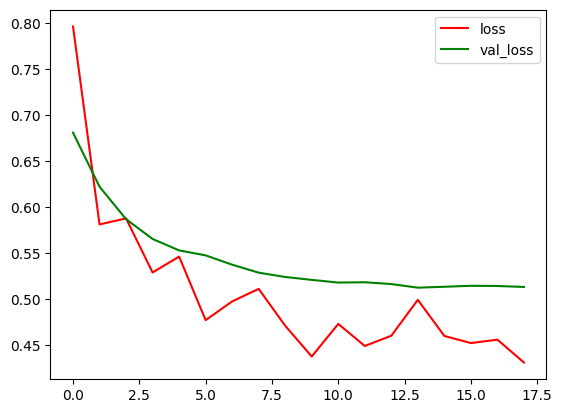

In [44]:
plt.plot(history.history['loss'],label='loss',color='red')
plt.plot(history.history['val_loss'],label='val_loss',color='green')
plt.legend()
plt.show()

Accuracy vs Val_Accuracy Graph

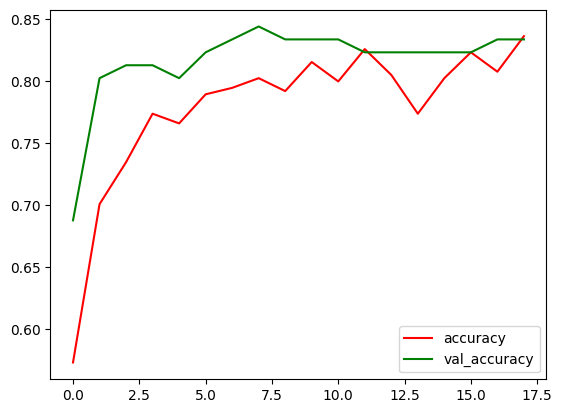

In [45]:
plt.plot(history.history['accuracy'],label='accuracy',color='red')
plt.plot(history.history['val_accuracy'],label='val_accuracy',color='green')
plt.legend()
plt.show()

Model Predictions based on test data

In [47]:
y_prob = model.predict(x_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [48]:
y_pred = np.where(y_prob >= 0.5 , 1 , 0)

In [49]:
y_pred

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [52]:
val_accuracy = history.history['val_accuracy'][-1]
val_loss = history.history['val_loss'][-1]

print(f"Validation Accuracy: {val_accuracy}")
print(f"Validation Loss: {val_loss}")

Validation Accuracy: 0.8333333134651184
Validation Loss: 0.5131719708442688
